## Predicting salary of people working in United States of America using public data


## Exploring the Data

In [2]:
# Import libraries 

import numpy as np
import pandas as pd
from time import time
from IPython.display import display 

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv("dataset.csv")

# Success - Display the first few records
display(data.head(n=5))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration

In [51]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data["income"]==">50K"].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data["income"]=="<=50K"].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent =round((n_greater_50k*100/n_records),3)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.784%


----
## Preparing the data for different kind me normalizing the data set

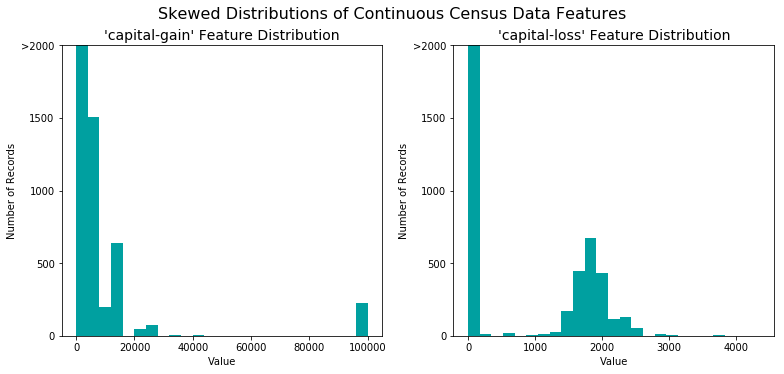

In [52]:
# Split the data into features and labels
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

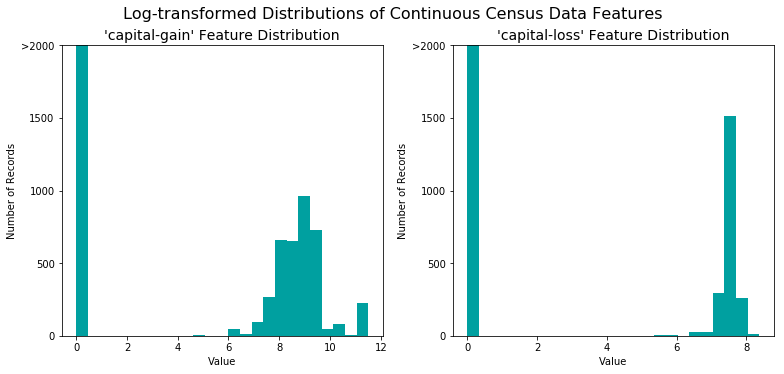

In [53]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions7
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features

In [54]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

In [55]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
print(type(features_final))

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x:1 if x==">50K" else 0)

#one hot encoding: process by which categorical variables are converted 
#into a form that could be provided to ML algorithms to do a better job in prediction

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))


<class 'pandas.core.frame.DataFrame'>
103 total features after one-hot encoding.


### Shuffle and Split Data

In [56]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance

### Naive Predictor Performace

In [57]:
np.sum(income)

11208

In [ ]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income)
FP = income.count() - TP
TN=0
FN=0

accuracy = float((TP)/(TP+FP))
recall = float((TP)/(TP+FN))
precision = float((TP)/(TP+FP))

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+ 0.5**2) *  (precision * recall)  / (0.5**2 * precision + recall )

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
The following are some of the supervised learning models
- Navie predictor
- Adaboost
- Random Forest 
- support vector machine

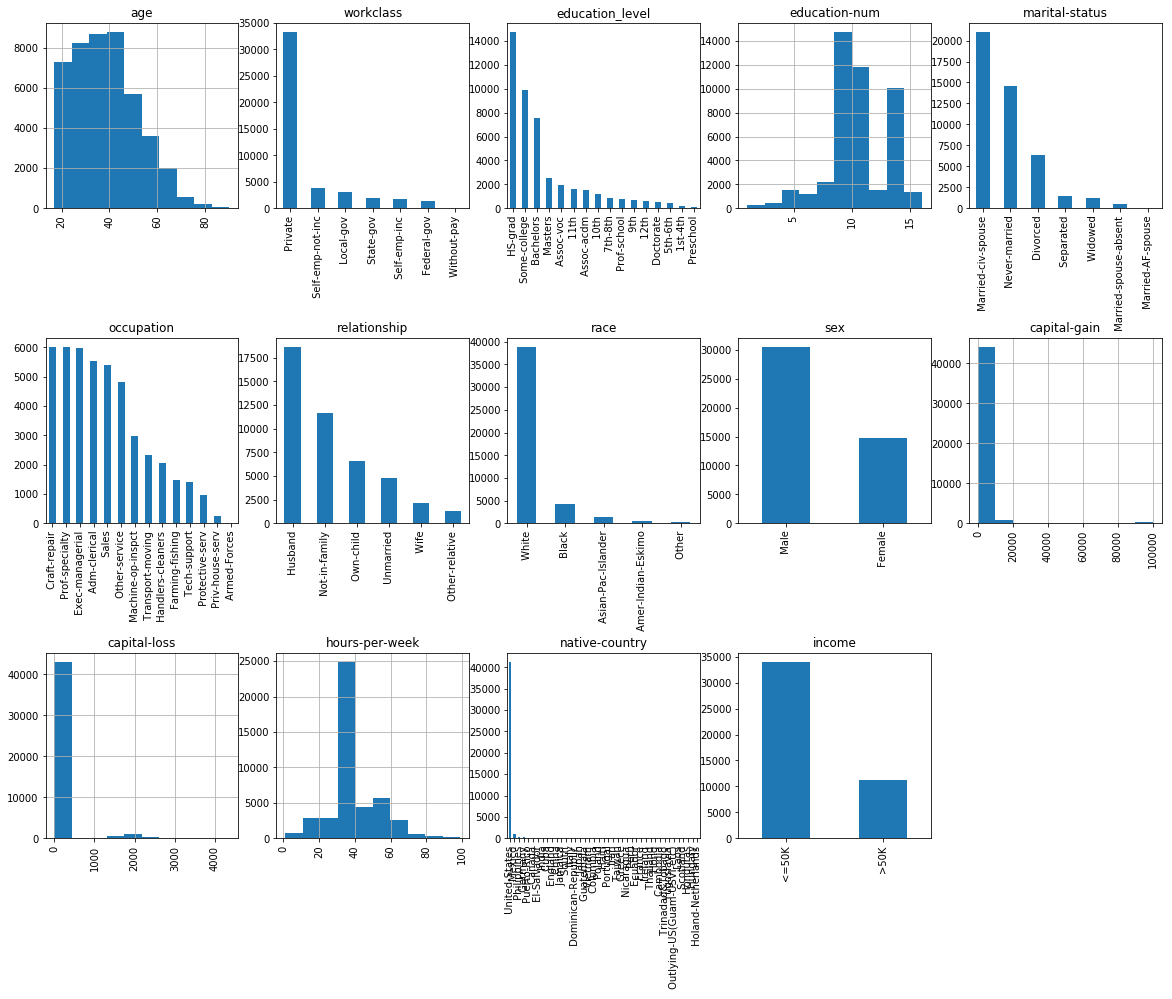

In [ ]:
import math
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

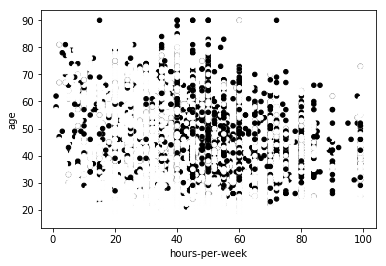

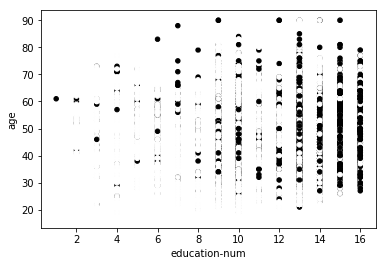

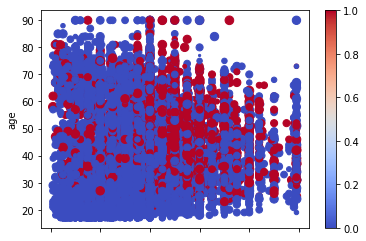

In [ ]:
%matplotlib inline


data.plot.scatter('hours-per-week','age', c=income)
data.plot.scatter('education-num','age', c=income)
data.plot.scatter('hours-per-week','age', c=income,cmap='coolwarm',s=data['education-num']*5)
plt.show()

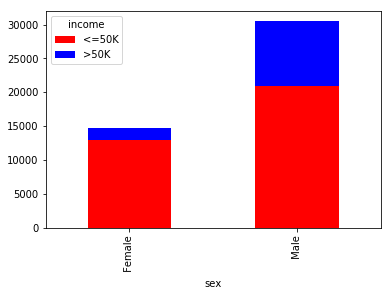

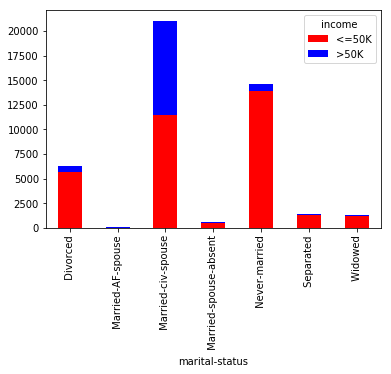

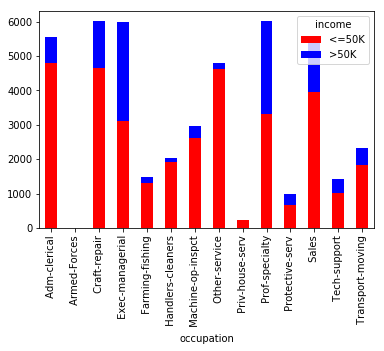

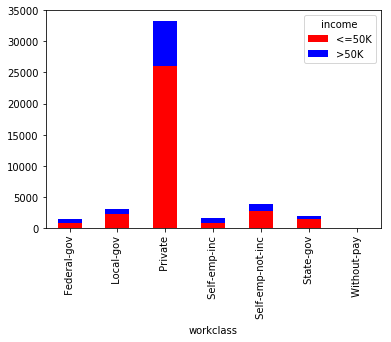

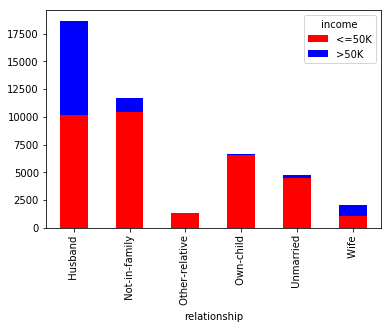

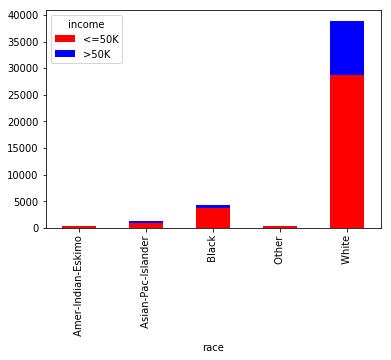

In [ ]:

cross_tab = pd.crosstab(data['sex'],data['income'],margins=True)

cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

cross_tab = pd.crosstab(data["marital-status"],data['income'],margins=True)

cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

cross_tab = pd.crosstab(data["occupation"],data['income'],margins=True)

cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

cross_tab = pd.crosstab(data["workclass"],data['income'],margins=True)

cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

cross_tab = pd.crosstab(data["relationship"],data['income'],margins=True)

cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

cross_tab = pd.crosstab(data["race"],data['income'],margins=True)

cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

plt.show()

### Model Application

### Implementation - Creating a Training and Predicting Pipeline

In [ ]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation

In [ ]:
# TODO: Import the three supervised learning models from sklearn

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')

# TODO: Initialize the three models
clf_A = svm.SVC(random_state = 543)
clf_B = RandomForestClassifier(random_state=543)
clf_C = AdaBoostClassifier(random_state=543)

samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)
print(samples_100,samples_10,samples_1)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

36177 3617 361
SVC trained on 361 samples.
SVC trained on 3617 samples.
